#Problem Statement

Customer personality analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#Target

Need to perform clustering to summarize customer segments.

#Content Attributes

**People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Module

In [1]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from numpy import int64
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data

The data used is sourced from Kaggle which can be accessed at the following link https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

The dataset for this project is provided by Dr. Omar Romero-Hernandez with totaling 2240 rows and 29 columns.

In [3]:
df = pd.read_excel('https://github.com/ainunsyafna/Project/blob/main/marketing_campaign.xlsx?raw=true')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Pre-Processing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [7]:
#change the data type
df['Income'] = df['Income'].astype('int64')
df['Complain'] = df['Complain'].astype('category')
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype('category')
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype('category')
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype('category')
df['AcceptedCmp4'] =df['AcceptedCmp4'].astype('category')
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype('category')
df['Response'] = df['Response'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2240 non-null   int64   
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [9]:
df.duplicated().sum()

0

#Exploratory Data Analysis

#Univariate Analysis

**Customer's Age**

In [10]:
from datetime import datetime
df['Age'] = df['Year_Birth'].apply(lambda x : datetime.now().year - x)

In [11]:
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Customers Age')

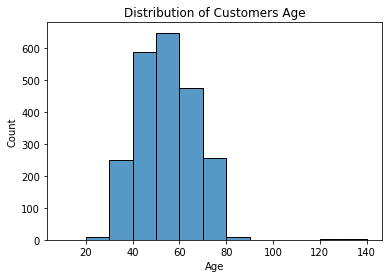

In [12]:
sns.histplot(data=df, x='Age', bins=list(range(10,150,10)))
plt.title('Distribution of Customers Age')

Based on the distribution chart of customer ages, it appears that most customers are between 40 - 60 years old.

**Customer's Education**

In [13]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

In [14]:
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [15]:
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

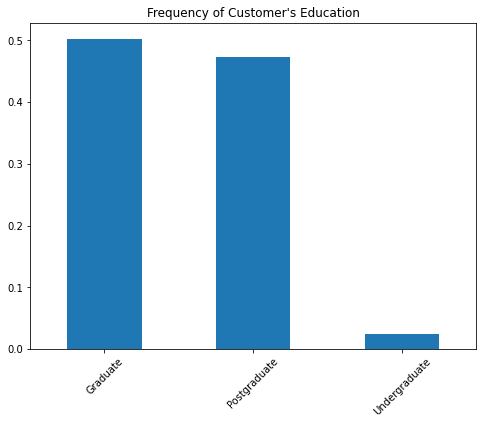

In [16]:
df["Education"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education");

Based on the bar chart of the frequency of customer's education, it appears that most of the customers are graduates about 50%, followed by postgraduates and only a few undergraduate customers.

**Marital Status**

In [17]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

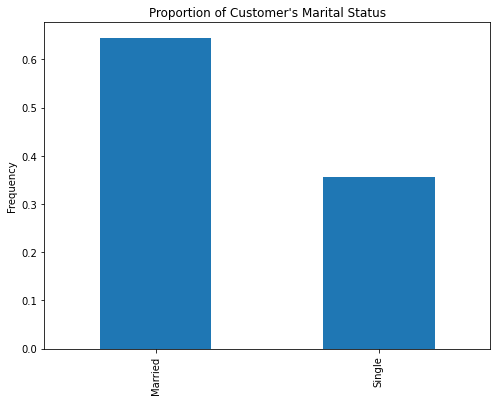

In [19]:
df["Marital_Status"].value_counts(normalize=True).plot.bar(figsize=(8,6))
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Marital Status");

Based on the bar chart of the proportion of customer's marital status, it appears that about 65% customers are married and about 35% customers are single.

**Income**

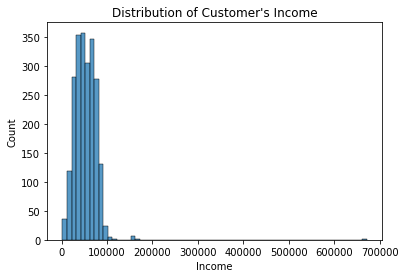

In [20]:
sns.histplot(data=df, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

Based on the distribution chart of customer's income, it appears that **majority** of the customer's income is within 0 - 100.000 dollar and also there are some customer that earn above 600.000 dollar. 

**Total Children**

In [21]:
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [22]:
df['TotalChildren'].unique()

array([0, 2, 1, 3])

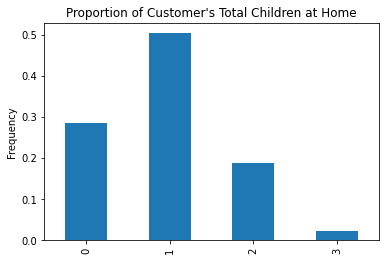

In [23]:
df["TotalChildren"].value_counts(normalize=True).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Total Children at Home");

Based on the bar chart of the proportion of customer's total children, it appears that about 50% customers have 1 child, followed by customers who do not have children, then have 2 children, and only a few customers have 3 children.

**Total Spent**

In [24]:
df['TotalSpent'] = df['MntFruits'] + df['MntFishProducts'] + df['MntGoldProds'] + df['MntSweetProducts'] + df['MntMeatProducts'] + df['MntWines']

In [25]:
df['TotalSpent'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalSpent, dtype: float64

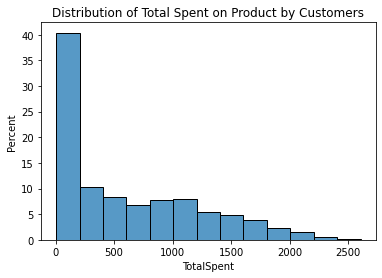

In [26]:
sns.histplot(data=df, x="TotalSpent", binwidth=200, stat="percent")
plt.title("Distribution of Total Spent on Product by Customers");

Based on the distribution chart of total spent on products by customers, it appears that half of customers spent on products is within 0 - 200 dollar. 

**Product**

In [27]:
FishProducts = df['MntFishProducts'].sum()
Fruits = df['MntFruits'].sum()
Wines = df['MntWines'].sum()
MeatProducts = df['MntMeatProducts'].sum()
SweetProducts = df['MntSweetProducts'].sum()
GoldProds = df['MntGoldProds'].sum()

print(FishProducts)
print(Fruits)
print(Wines)
print(MeatProducts)
print(SweetProducts)
print(GoldProds)

84057
58917
680816
373968
60621
98609


In [28]:
Product = {'Products' : ['Fish Products','Fruits','Wines','Meat Products','Sweet Products','Gold Prods'],
           'Quantity' : [84057,58917,680816,373968,60621,98609]}
df_product = pd.DataFrame(Product)
df_product

,Products,Quantity
0,Fish Products,84057
1,Fruits,58917
2,Wines,680816
3,Meat Products,373968
4,Sweet Products,60621
5,Gold Prods,98609


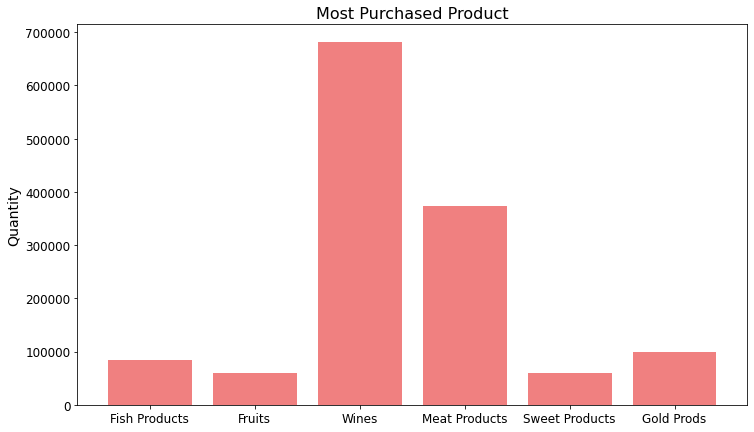

In [29]:
plt.figure(figsize=(12,7))
plt.bar(df_product['Products'], df_product['Quantity'], color='lightcoral')

plt.title('Most Purchased Product', size=16)
plt.ylabel('Quantity', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Based on the bar chart of the most purchased product, it appears that customers purchased almost 700.000 wines, purchased almost 400.000 meat products, purchased over 100.000 gold products, purchased almost 100.000 fish products, and purchased less than 100.000 fruits and sweet products.  

**Place**

In [30]:
Web = df['NumWebPurchases'].sum()
Catalog = df['NumCatalogPurchases'].sum()
Store = df['NumStorePurchases'].sum()

print(Web)
print(Catalog)
print(Store)

9150
5963
12970


In [31]:
Place = {'Place' : ['Web Purchases','Catalog Purchases','Store Purchases'],
         'Quantity' : [9150,5963,12970]}
df_place = pd.DataFrame(Place)
df_place

,Place,Quantity
0,Web Purchases,9150
1,Catalog Purchases,5963
2,Store Purchases,12970


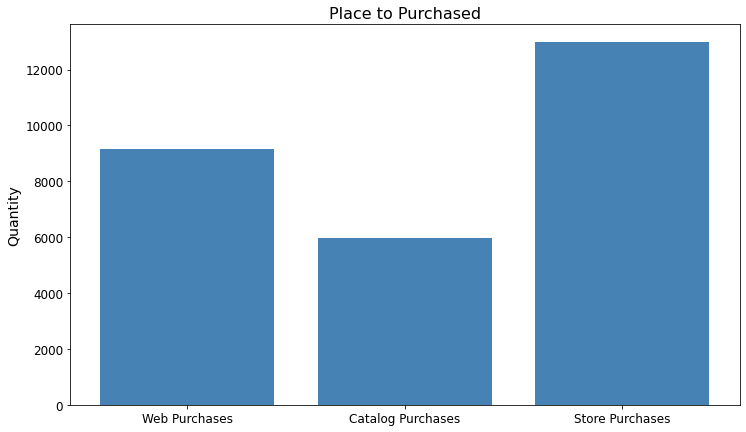

In [32]:
plt.figure(figsize=(12,7))
plt.bar(df_place['Place'], df_place['Quantity'], color='steelblue')

plt.title('Place to Purchased', size=16)
plt.ylabel('Quantity', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Based on the bar chart of the place to purchased products, customers **prefer** to purchased directly to the store, then purchased on the websites, last purchased through the catalog.

#Bivariate Analysis

**Customer's Age and Total Spent**

In [33]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [34]:
df["Age Group"] = df["Age"].apply(group_age)
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

In [35]:
mask = df.groupby("Age Group")["TotalSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, 
             x="Age Group", 
             y="TotalSpent",
             title = "Relationship Between Customer's Age Group and Total Spent", 
             height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["TotalSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

Based on the bar chart of the relationship between customer's age group and total spent, it appears that the group that **spends the most** on total spent is customers with an age range of 21-30 years which is 1127 dollar, followed by customers with an age range of 71-80 years which is 685 dollar. Let's look at the comparison distribution.

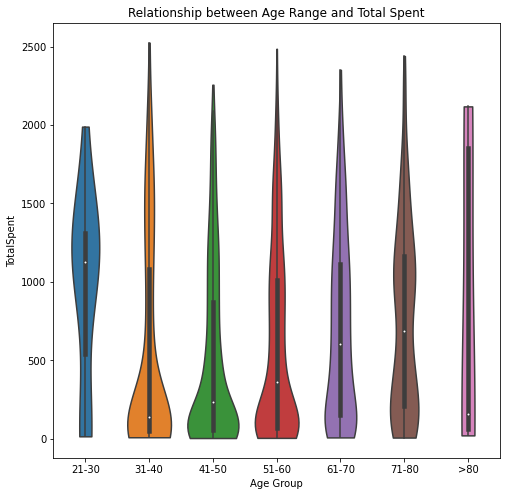

In [36]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age Group", y="TotalSpent", data=df, cut=0, order=order)
plt.title("Relationship between Age Range and Total Spent");

Then a violin plot is made to find out whether there are outliers or not. It appears that most age groups have outliers. For example, the age group 80 years and over has a lot of outliers.

**Customer's Age and Income**

In [37]:
from scipy.stats import iqr
iqr = iqr(df["Income"], nan_policy="omit")

low = np.nanquantile(df["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(df["Income"], 0.75) + 1.5 * iqr

In [38]:
df_cut = df[df["Income"].between(low, high)]

In [39]:
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, 
             x="Age Group", 
             y="Income",
             title = "Relationship Between Customer's Age Group and Income",
             height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

Based on the bar chart of the relationship between customer's age and income, it appears that the group with **greater income** are the customers within above 80 years which is 64904.4 dollar, followed by the customers within 21 - 30 years which is 63576.87 dollar, and the **least income** are the customers within 31 - 40 years which is 44734.26 dollar.

**Customer's Education and Total Spent**

In [40]:
mask = df.groupby("Education")["TotalSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="TotalSpent", height=500,
            title = "Relationsip Between Education and Total (Average) Spent")

annotation = []
for x, y in zip(mask["Education"], mask["TotalSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

Based on the bar chart of relationship between education and total (average) spent, it appears that graduate customers and postgraduate customer have a total (average) spent that is not significantly different. Graduate customers have the highest total average spent, 3 dollar more than postgraduate customers. However, undergraduate customers have a significantly different total (average) spent with graduate and postgraduate customers about 7 times less.

**Customer's Education and Income**

In [41]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customer's Education Level and Average Income")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

Based on the bar chart of relationship between education and average income, it appears that graduate customers and postgraduate customer have an average income that is not significantly different. Postgraduate customers have the highest average income, 887.44 more than graduate customers. However, undergraduate customers have a significantly different average income with graduate and postgraduate customers about 2 times less.

**Total Children and Total Spent**

In [42]:
mask = df.groupby("TotalChildren")["TotalSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="TotalChildren", y="TotalSpent", height=500,
             title="Relationship between Total Children and Total (Average) Spent")

annotation = []
for x, y in zip(mask["TotalChildren"], mask["TotalSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

Based on the bar chart of relationship between total children and total (average) spent, it appears that customers who do not have children spend more. It also appears that the more children a customer has, the less the total average spent.

**Total Spent and Income**



In [43]:
fig = px.scatter(data_frame=df_cut, 
                 x="Income",
                 y="TotalSpent", 
                 title="Relationship Between Customer's Income and Total Spent",
                 height=500,
                 color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

Based on the scatter plot of relationship between customers income and total spent, it appears the income of a customer determines the total amount that must be spent on the product. As a customer's income increases, so does what they buy.

#Multivariate Analysis

**Education, Income, and Total Spent**

In [44]:
fig = px.scatter(data_frame=df_cut,
                 x = "Income",
                 y= "TotalSpent",
                 title = "Relationship between Income and Total Spent Based on Education",
                 color = "Education",
                 height=500)
fig.show()

Based on the scatter plot of relationship between income and total spent based on educational background, it appears that undergraduate customers have less income so that the total spent. Also, the higher the customer's educational background, the higher the income and total spent.

In [45]:
fig = px.scatter(data_frame=df_cut,
                 x = "Income",
                 y= "TotalSpent",
                 title = "Relationship between Income and Total Spent Based on Total Children",
                 color = "TotalChildren",
                 height=500)
fig.show()

Based on the scatter plot of relationship between income and total spent based on total children, It appears that customers who do not have children have higher income and higher total spent than customers who have children. There also appears to be an inverse comparison between the number of children and income and total spent. The more children a customer has, the less income and total spent.

#Conclusion EDA

Based on exploratory data analysis, we can conclude several conclusions
- Customer income is the main indicator that determines the customer's total spending on a product.
- The products that customers buy the most are wines and the least are fruits.
- Customers prefer to buy products directly to the store, this may be because if we shop directly we can see firsthand the quality of the products we buy.
- In terms of educational background, customers with graduate education and above tend to spend 7 times higher than those customers with undergraduate education level. The reason is because graduate customers and postgraduate customers earns above 2 times than undergraduate customers.
- In term of total children the customers has, customers who do not have children have higher income and higher total spent than customers who have children. There also appears to be an inverse comparison between the number of children and income and total spent. The more children a customer has, the less income and total spent.

#Customers Segmentation

K-Means clustering is an efficient machine learning algorithm to solve data clustering problems. It’s an unsupervised algorithm that’s quite suitable for solving customer segmentation problems.

Unlike supervised learning algorithms, K-means clustering is an unsupervised machine learning algorithm. This algorithm is used when we have unlabelled data. Unlabelled data means input data without categories or groups provided. Our customer segmentation data is like this for this problem. 

The algorithm discovers groups (cluster) in the data, where the number of clusters is represented by the K value. The algorithm acts iteratively to assign each input data to one of K clusters, as per the features provided. All of this makes k-means quite suitable for the customer segmentation problem.

**K-means Model With 2 Variables**

The k-means model that will be created uses 2 variables, that is variable Income and variable Total Spent.

In [46]:
data1 = df[["Income", "TotalSpent"]]

In [47]:
df_log = np.log(data1)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [49]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

**The Elbow Method**

The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values. This represents how spread-apart the generated clusters are from one another. In this case, the K-means algorithm is evaluated for several values of k, and the within-cluster sum of square values is calculated for each value of k. After this, we plot the K versus the sum of square values. After analyzing this graph, the number of clusters is selected, so that adding a new cluster doesn’t change the values of the sum of square values significantly.

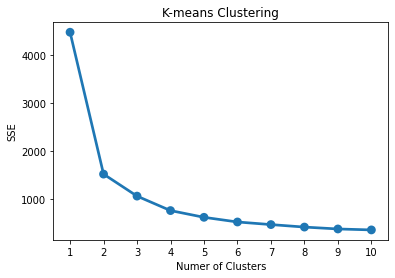

In [50]:
plt.title('K-means Clustering')
plt.xlabel('Numer of Clusters'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

In [51]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


Based on that algorithm, we obtain that the optimal number of clusters is 3

In [52]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [53]:
data1 = data1.assign(ClusterLabel= model.labels_)

In [54]:
data1.groupby("ClusterLabel")[["Income", "TotalSpent"]].median()

,Income,TotalSpent
ClusterLabel,,
0,25261.5,43.0
1,69084.0,1069.5
2,42641.0,145.0


In [55]:
fig = px.scatter(data_frame=data1,
                 x = "Income",
                 y= "TotalSpent",
                 title = "Relationship between Income VS Total Spent",
                 color = "ClusterLabel",
                 height=500)

fig.show()

Based on the scatter plot we can conclude that there are 3 customers segmentation,


* The first segment is customers with low income and low spending.
* The second segment is customers with high income and high spending
* The third segment is customers with moderate income and moderate spending.



**K-means Model With 3 Variables**

The k-means model that will be created uses 3 variables, that is variable Income, variable Total Spent, and variable Age.

In [56]:
data2 = df[["Age", "Income", "TotalSpent"]]

In [57]:
df_log = np.log(data2)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [58]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

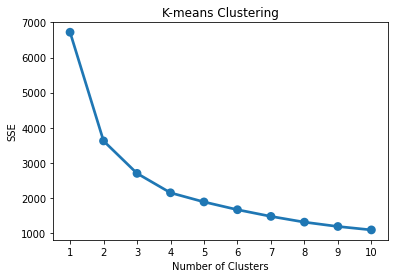

<Figure size 432x288 with 0 Axes>

In [67]:
plt.title('K-means Clustering')
plt.xlabel('Number of Clusters'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()
plt.savefig("Elbow 3 Variable.png")

In [60]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)


data2 = data2.assign(ClusterLabel= model.labels_)

In [61]:
result = data2.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TotalSpent":"median"}).round()
result

,Age,Income,TotalSpent
ClusterLabel,,,
0,50.0,31801.0,54.0
1,45.0,67402.0,1001.0
2,66.0,62814.0,822.0


In [62]:
fig = px.scatter_3d(data_frame=data2, 
                    x="Income",
                    y="TotalSpent", 
                    z="Age", 
                    color="ClusterLabel", 
                    height=550,
                    title = "Relationship Between Customer's Age, Income, and Total Spent")
fig.show()

Based on the scatter plot we can conclude that there are 3 customers segmentation,


* The first segment describe old customers with low income and low spending.
* The second segment describe young customers with high income and high spending.
* The third segment describe old customers with moderate income and moderate spending.




#Conclusion Customer Segmentation

It is unwise to serve all customers with the same product, campaign or advertisement. Customers have different needs. One-size-fits-all approach to business will generally result in fewer successful product promotions and ultimately fewer sales. Customer segmentation is a cure for this problem. Therefore we segmented our customers into 3 groups and ready to start to choose our groups based on our marketing aims.

Segmentation helps marketers to be more efficient in terms of time, money and other resources. They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products.



